<a href="https://colab.research.google.com/github/smomtahe/Project_BreastCancer_Advanced_DeepLearnig/blob/main/3_NLP_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure you have the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
dataset_df = pd.read_csv('/content/dataImagesSum.csv')

# Function to extract keywords by removing stopwords
def extract_keywords(text):
    # Tokenize the text
    word_tokens = word_tokenize(text.lower())
    # Filter out stopwords and words with less than 3 characters
    keywords = [word for word in word_tokens if word not in stopwords.words('english') and len(word) > 2]
    return keywords

# Apply the function to extract keywords from the 'info' column
dataset_df['keywords'] = dataset_df['info'].apply(extract_keywords)

# Function to determine if text is related to 'phantom' or 'patient'
def classify_text(keywords):
    if 'phantom' in keywords:
        return 'phantom'
    elif 'patient' in keywords:
        return 'patient'
    else:
        return 'unknown'

# Classify each row based on keywords
dataset_df['classification'] = dataset_df['keywords'].apply(classify_text)

# Print out the classifications
print(dataset_df[['info', 'classification']])

# Label the phantom images if the keyword 'center' is present
def label_phantom_images(row):
    if 'phantom' in row['classification'] and 'center' in row['keywords']:
        return 'Phantom is at center'
    elif 'phantom' in row['classification'] and 'left' in row['keywords']:
        return 'Phantom is at left'
    elif 'phantom' in row['classification'] and 'right' in row['keywords']:
        return 'Phantom is at right'
    elif 'patient' in row['classification']:  # would liek to replce to upper leter
        return 'Patient:'
    return row['info']

# Apply the labeling function
dataset_df['labeled_info'] = dataset_df.apply(label_phantom_images, axis=1)

# Now, dataset_df contains a new column 'labeled_info' with the updated labels for phantom images at the center
print(dataset_df[['info', 'labeled_info']])

# Save the labeled dataset to a new CSV file
labeled_dataset_path = '/content/labeled_dataImagesSum.csv'
dataset_df.to_csv(labeled_dataset_path, index=False)

print(f"Labeled dataset saved to {labeled_dataset_path}")


                                      info classification
0                          phantom: center        phantom
1                            phantom: left        phantom
2                           phantom: right        phantom
3                 patient 6: pre-treatment        patient
4            patient 6: post-treatment # 7        patient
..                                     ...            ...
61      patient 37: pre-treatment slice #2        patient
62  patient 37: post-treatment #7 slice #3        patient
63      patient 39: pre-treatment slice #1        patient
64      patient 45: pre-treatment slice #6        patient
65         patient 45: post-chemo slice #6        patient

[66 rows x 2 columns]
                                      info          labeled_info
0                          phantom: center  Phantom is at center
1                            phantom: left    Phantom is at left
2                           phantom: right   Phantom is at right
3                 pat

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


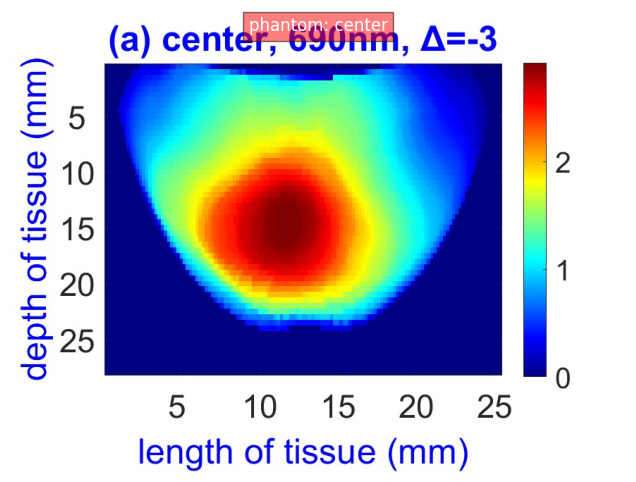

In [ ]:
#  Label the "images"

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Read the label for the first image from the 'info' column
first_image_label = dataset_df['info'].iloc[0]

# We will use the uploaded 'image.png' as a stand-in for the first image
image_path = '/content/images/1.jpg'

# Function to add label to an image
def add_label_to_image(image_path, label):
    # Open the image file
    image = Image.open(image_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.text(image.size[0] / 2, 10, label, ha='center', va='top', color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
    plt.axis('off')
    plt.show()

# Add the label to the image and display it
add_label_to_image(image_path, first_image_label)
